# Airline Dataset

# 1. Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import warnings
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# 2. Loading the data

In [68]:
#Read File from CSV file and saving it in airline_data DataFrame
df = pd.read_csv("airline_data.csv")
airline_data = df

In [69]:
# To display the top 5 rows
airline_data.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [70]:
#InfoDescribe to see an overview of the Dataframe
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [71]:
#Descriptive Analytics of the numerical Variable "Rating"
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3575.0,4.79049,3.170323,1.0,2.0,4.0,8.0,10.0


# 3. Data Pre-processing

In [72]:
#Checkign the percentage of Null values betweeen the total of values per column
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name     0.000000
Flying_month      21.368715
Route             21.340782
Rating             0.139665
Verified          64.525140
Review_title       0.000000
Review_content     0.000000
Traveller_type     0.000000
Class              0.027933
dtype: float64

In [73]:
#Drop "Verified" parameter as it has more than 60% of null values and the data can not be gather from other parameters 
airline_data.drop('Verified',axis=1, inplace = True)

## 3.1 Cleaning: 'Class'

In [74]:
#Exploring the Data in the Column 'Class', there are 8 values that are different from: Business Class, Economy Class, First Class, Premium Economy.
airline_data.groupby('Class').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type
Class,,,,,,,
Business,430,430,430,430,430,430,430
Business Class,183,183,183,183,183,183,183
Couple Leisure,641,641,641,641,641,641,641
Economy Class,676,675,676,676,676,676,676
Family Leisure,234,234,234,234,234,234,234
First Class,11,11,11,11,11,11,11
LHR to ORD,1,1,1,1,1,1,1
London to Malaga,1,1,1,1,1,1,1
Los Angeles to London to Paris to Rome,1,1,1,1,1,1,1


In [75]:
#To leave the original data fixed, we will create a new temporal parameter called "Class_temporal" to modify and clean
airline_data['Class_temporal'] = airline_data['Class']

In [76]:
#After filter the rows to be cleaned in the "Class_temporal" parameter, we found there is "Class" data in the Route Parameter. We proceed to copy that data a new variable called "Class_in_Route"
Class_in_route = airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class')]['Route']

In [77]:
#Then, we paste this "Class_in_route" data to
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = Class_in_route

In [78]:
#We check again and there is only 3 values our of the "Class" real values
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,866,866,866,866,866,866,866,866
Economy Class,1522,1521,1522,1522,1522,1522,1522,1522
First Class,154,154,154,154,154,154,154,154
Jan-17,1,1,1,1,1,1,1,1
Jul-22,1,1,1,1,1,1,1,1
May-15,1,1,1,1,1,1,1,1
Premium Economy,271,271,271,271,271,271,271,271


In [79]:
#We can see there is data in Traveller Type that should be in Class
airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Jul-22
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,Jan-17
2794,Tom Moore,no,May-15,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome,May-15
2816,Charlotte Stiley,NaN,NaN,1.0,British Airways customer review,Travelled from Venice to Gatwick on 28th May c...,Business Class,no,NaN
2817,Tarun Thadani,NaN,NaN,2.0,British Airways customer review,Worst customer experience on BA flight. I have...,Economy Class,no,NaN
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN


In [80]:
#We copy in a parameter called "Class_in_traveller"
Class_in_traveller = airline_data[(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')]['Traveller_type']

In [81]:
#Paste the data in the Parameter 'Class_temporal' filtered
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = Class_in_traveller

In [82]:
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,1161,867,867,1160,1161,1161,1161,1161
Economy Class,1849,1521,1522,1846,1849,1849,1849,1849
First Class,210,155,155,209,210,210,210,210
Premium Economy,358,271,271,358,358,358,358,358
Solo Leisure,1,1,1,1,1,1,1,1
no,1,0,0,1,1,1,1,0


In [83]:
#Last 2 rows, the data can be deducted from the review comment and will be assing it as Economy Class
airline_data['Class_temporal'][(airline_data['Class_temporal'] != 'Premium Economy') & (airline_data['Class_temporal'] != 'Business Class') & (airline_data['Class_temporal'] != 'First Class') & (airline_data['Class_temporal'] != 'Economy Class')] = 'Economy Class'

In [84]:
#All the rows of the dataframe contains the righ information in the parameter 'Class_temporal'
airline_data.groupby('Class_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_temporal,,,,,,,,
Business Class,1161,867,867,1160,1161,1161,1161,1161
Economy Class,1851,1522,1523,1848,1851,1851,1851,1850
First Class,210,155,155,209,210,210,210,210
Premium Economy,358,271,271,358,358,358,358,358


## 3.2 Cleaning: Traveller Type

In [85]:
#Exploring the Data in the Column 'Class', there are 8 values that are different from: Business Class, Economy Class, First Class, Premium Economy.
airline_data.groupby('Traveller_type').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Class,Class_temporal
Traveller_type,,,,,,,,
767-300,1,1,1,1,1,1,1,1
777,3,3,3,3,3,3,3,3
777-200,1,1,1,1,1,1,1,1
777-300,1,1,1,1,1,1,1,1
787,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Saab 2000,1,1,1,1,1,1,1,1
Solo Leisure,307,307,307,307,307,307,307,307
Various,1,1,1,1,1,1,1,1


In [86]:
#To leave the original data fixed, we will create a new temporal parameter called "Traveller_temporal" to modify and clean
airline_data['Traveller_temporal'] = airline_data['Traveller_type']

In [87]:
#After filter the rows to be cleaned in the "Traveller_temporal" parameter, we found there is "Traveller Type" data in the Class Parameter. We proceed to copy that data a new variable called "Traveller_in_Class"
Traveller_in_class = airline_data['Class'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')]

In [88]:
#Then, we paste that data innto the Traveller_temporal parameter filtered
airline_data['Traveller_temporal'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')] = Traveller_in_class

In [89]:
#We check again, and there are still values to clean
airline_data.groupby('Traveller_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
Traveller_temporal,,,,,,,,,
Business,623,623,623,623,623,623,623,623,623
Couple Leisure,949,949,949,949,949,949,949,949,949
Family Leisure,382,381,382,382,382,382,382,382,382
LHR to ORD,1,1,1,1,1,1,1,1,1
London to Malaga,1,1,1,1,1,1,1,1,1
Solo Leisure,860,860,860,860,860,860,860,860,860
no,322,0,0,317,322,322,322,322,322
yes,441,0,0,441,441,441,441,441,441


In [90]:
#Looking at other parameter, the information can not be found in any of them
airline_data[(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Business Class,London to Malaga
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,First Class,LHR to ORD
2816,Charlotte Stiley,NaN,NaN,1.0,British Airways customer review,Travelled from Venice to Gatwick on 28th May c...,Business Class,no,Business Class,no
2817,Tarun Thadani,NaN,NaN,2.0,British Airways customer review,Worst customer experience on BA flight. I have...,Economy Class,no,Economy Class,no
2818,Thomas Varughese,NaN,NaN,1.0,British Airways customer review,I had this terrible experience of traveling Br...,Economy Class,no,Economy Class,no
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,no
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,no
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,yes


In [91]:
#We set all those values as 'Unknown' 
airline_data['Traveller_temporal'][(airline_data['Traveller_temporal'] != 'Solo Leisure') & (airline_data['Traveller_temporal'] != 'Family Leisure') & (airline_data['Traveller_temporal'] != 'Business') & (airline_data['Traveller_temporal'] != 'Couple Leisure')] = 'Unknown'

In [92]:
airline_data.groupby('Traveller_temporal').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal
Traveller_temporal,,,,,,,,,
Business,623,623,623,623,623,623,623,623,623
Couple Leisure,949,949,949,949,949,949,949,949,949
Family Leisure,382,381,382,382,382,382,382,382,382
Solo Leisure,860,860,860,860,860,860,860,860,860
Unknown,766,2,2,761,766,766,766,765,766


## 3.4 Cleaning: Flying Month

In [93]:
airline_data.groupby('Flying_month').count()

,Passanger_Name,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal
Flying_month,,,,,,,,,
ACC to ZRH via LHR,1,1,1,1,1,1,1,1,1
AGP to LGW,1,1,1,1,1,1,1,1,1
AMS to BKK via LHR,1,1,1,1,1,1,1,1,1
AMS to GRU via LHR,1,1,1,1,1,1,1,1,1
AMS to HKG via LHR,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
doha to londonDoha to London,1,1,1,1,1,1,1,1,1
iAH to LHR,1,1,1,1,1,1,1,1,1
lgw to alicante,1,1,1,1,1,1,1,1,1


In [94]:
#Creating a new Flying Month temporal parameter
airline_data['Flying_month_temporal'] = airline_data['Flying_month']

In [95]:
#There are 8 rows in Route that can be used in Flying Month 
airline_data[(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal
42,Nicholas Felty,no,May-23,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,Business Class,Couple Leisure,no
224,Mark Robinson,no,Jul-22,1.0,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,Business Class,Unknown,no
234,Paul Mayer,no,Jun-22,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,Business Class,Family Leisure,no
419,barbara ciereszko,no,Jul-21,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,Economy Class,Family Leisure,no
1748,Simon Warner,no,Jan-17,5.0,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,First Class,Unknown,no
2552,Steve Purkis,no,Feb-15,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,Economy Class,Family Leisure,no
2567,Travis Rodgers,no,Sep-15,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,no
2794,Tom Moore,no,May-15,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome,Economy Class,Solo Leisure,no


In [96]:
#Filtering and copying the data in Route that contains FLying Months and stored in 'Flying_month_in_route" variable
Flying_month_in_route = airline_data['Route'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))]

In [97]:
#Pasting the filtering data in the Flying Month temporal Parameter
airline_data['Flying_month_temporal'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Route'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))] = Flying_month_in_route

In [98]:
#Checking all the other columns, there are not Flying Month data in the other Columns. Except in Review Content, however the data is not uniform to be extracted.
airline_data[(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False)) & (airline_data['Review_content'].str.contains('|'.join(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal
7,Richard Hodges,London Heathrow to Kalamata,Economy Class,7.0,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,Boeing 737,Couple Leisure,Economy Class,Couple Leisure,London Heathrow to Kalamata
19,Benjamin Stevens,Seattle to Edinburgh via Heathrow,Economy Class,1.0,customer service was horrendous,"May 3, flew from Seattle to Heathrow then to E...",Boeing 777,Business,Economy Class,Business,Seattle to Edinburgh via Heathrow
35,Steve Bennett,London to Nice,Business Class,4.0,do not think the fare was worth the money,Paid a quick visit to Nice yesterday from Heat...,A319,Couple Leisure,Business Class,Couple Leisure,London to Nice
110,C Barton,London to Madrid,Economy Class,1.0,found the attitude appalling,My review relates to the appalling experiences...,A320,Solo Leisure,Economy Class,Solo Leisure,London to Madrid
130,C Bain,Atlanta to London,Economy Class,4.0,This flight was so disappointing,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...,Boeing 777-200,Family Leisure,Economy Class,Family Leisure,Atlanta to London
...,...,...,...,...,...,...,...,...,...,...,...
3564,C Denson,NaN,NaN,10.0,British Airways customer review,Chicago O'Hare to London Heathrow on 2 May. ch...,Economy Class,yes,Economy Class,Unknown,NaN
3566,Iain Henderson,NaN,NaN,1.0,British Airways customer review,BA 059 London to Cape Town April 29 2014 econo...,Economy Class,no,Economy Class,Unknown,NaN
3569,Jack Hughes,NaN,NaN,8.0,British Airways customer review,Heathrow Marrakech. Had previously travelled o...,Economy Class,yes,Economy Class,Unknown,NaN
3570,D Nolan,NaN,NaN,5.0,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,yes,Business Class,Unknown,NaN


In [99]:
#We filter out all the values that contains a year format
airline_data['Flying_month_temporal'][(~airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))] = 'Unknown'
airline_data['Flying_month_temporal'][airline_data['Flying_month_temporal'].isnull() == True] = 'Unknown'

In [100]:
#Creating a subset with the Flying month that can be used to analysis
airline_data_month = airline_data[(airline_data['Flying_month_temporal'].str.contains('|'.join(['Jan-','Feb-','Mar-','Apr-','May-','Jun-','Jul-','Aug-','Sep-','Oct-','Nov-','Dec-']), na=False))]
airline_data_month

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal
0,Paige Boet,Jun-23,New Orleans to London,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23
1,S Layne,Mar-23,London to Amman,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Business Class,Couple Leisure,Mar-23
3,Joel Burman,Jun-23,Amman to London,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jun-23
5,M King,Jun-23,London to Washington,1.0,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Jun-23
8,Carol Willmore,Jun-23,London to Funchal,1.0,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Jun-23
...,...,...,...,...,...,...,...,...,...,...,...
2788,C Barkei,Jun-15,LHR to LUX,8.0,British Airways customer review,Short hop from the empty terminal 1 at LHR to ...,Business,Business Class,Business Class,Business,Jun-15
2794,Tom Moore,no,May-15,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,Los Angeles to London to Paris to Rome,Economy Class,Solo Leisure,May-15
2795,Michael Stanley,Jun-15,LHR to BKK,6.0,British Airways customer review,LHR to BKK June 13th 2015 Club World (Business...,Couple Leisure,Business Class,Business Class,Couple Leisure,Jun-15
2798,Nazira Khatun,Jun-15,London to Turkey,10.0,British Airways customer review,I flew out on the 8th June 2015 and all I can ...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Jun-15


In [101]:
#For visualization and answer a questions, splitting the Month to get the months
airline_data_month['Month'] = airline_data_month['Flying_month_temporal'].str[0:3]
airline_data_month['Month_num'] = airline_data_month['Month']

In [102]:
#Updating the aprameter with the full month name
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Jan',1)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Feb',2)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Mar',3)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Apr',4)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('May',5)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Jun',6)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Jul',7)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Aug',8)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Sep',9)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Oct',10)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Nov',11)
airline_data_month['Month_num'] = airline_data_month['Month_num'].replace('Dec',12)

In [103]:
airline_data_month = airline_data_month.sort_values(by='Month_num', ascending = True)
airline_data_month

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Month,Month_num
1645,C Leventis,Jan-17,Montreal to Athens via Heathrow,1.0,never use British Airways again,Verified Review I am 73 years old. Was sched...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jan-17,Jan,1
128,Jozef Kis,Jan-23,Gatwick to Dublin,1.0,you should let me use the lounge,Being a silver flyer and booking a flight thro...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jan-23,Jan,1
1844,A Oldham,Jan-16,LHR to IST,1.0,absolute disgrace,Verified Review Absolute disgrace. They canc...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jan-16,Jan,1
48,Michelle Morgan,Jan-23,Sweden to Los Angeles via London,1.0,lack of customer service,I travelled with British Airways from Sweden t...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Jan-23,Jan,1
1712,D Williams,Jan-17,Orlando to London Heathrow,1.0,Will never touch British Airways again,Verified Review Will never touch British Air...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Jan-17,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Martin McCormack,Dec-22,Dublin to Orlando via Heathrow,1.0,one of the worst experiences,This was literally one of the worst experience...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Dec-22,Dec,12
434,G Dimitar,Dec-20,Sofia to London Heathrow,1.0,Do not recommend to anyone in Covid restrictions,4 cancellations for 1 month! Applying vouchers...,Solo Leisure,Economy Class,Economy Class,Solo Leisure,Dec-20,Dec,12
2358,John Davey,Dec-15,LHR to JNB,2.0,a very poor experience,London to Johannesburg return with British Air...,Family Leisure,Economy Class,Economy Class,Family Leisure,Dec-15,Dec,12
2368,James Cohen,Dec-15,New York to London,1.0,entirely unsympathetic,"I booked a non-refundable round trip ticket, N...",Business,Economy Class,Economy Class,Business,Dec-15,Dec,12


## 3.4 Cleaning: Route

In [104]:
airline_data.groupby('Route')['Route'].count()

Route
 Bridgetown to Gatwick        1
 London Heathrow to Madrid    1
ABV to LHR                    1
ABZ to SFO via LHR            1
ACC to LHR                    1
                             ..
Zagreb to London              1
Zagreb to London Heathrow     1
Zurich to London              5
Zurich to London Heathrow     2
yes                           1
Name: Route, Length: 744, dtype: int64

In [105]:
#Create New Column to modify as the column could have data usefull for others
airline_data['Route_temporal'] = airline_data['Route']

In [106]:
#Digging into the data, if we filter route in Class values, we findin the parameter 'Flying month', there are data of Routes in 1,858 rows
Route_in_flying = airline_data[(airline_data['Route_temporal'] == 'Premium Economy') | (airline_data['Route_temporal'] == 'Business Class') | (
                airline_data['Route_temporal'] == 'First Class') | (airline_data['Route_temporal'] == 'Economy Class')]['Flying_month']

In [107]:
#Paste Data in the new Class Column, filtering by rows without relevant information for Class
airline_data['Route_temporal'][(airline_data['Route_temporal'] == 'Premium Economy') | (airline_data['Route_temporal'] == 'Business Class') | (
                airline_data['Route_temporal'] == 'First Class') | (airline_data['Route_temporal'] == 'Economy Class')] = Route_in_flying

In [108]:
#Paste the values in Route temporal filtered from Class
airline_data['Route_temporal'][(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'].isnull() == False)] = airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'].isnull() == False)]['Class']

In [109]:
airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Route_temporal
42,Nicholas Felty,no,May-23,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,Business Class,Couple Leisure,May-23,May-23
234,Paul Mayer,no,Jun-22,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,Business Class,Family Leisure,Jun-22,Jun-22
419,barbara ciereszko,no,Jul-21,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,Economy Class,Family Leisure,Jul-21,Jul-21
2552,Steve Purkis,no,Feb-15,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,Economy Class,Family Leisure,Feb-15,Feb-15
2567,Travis Rodgers,no,Sep-15,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,Economy Class,Couple Leisure,Sep-15,Sep-15
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,Unknown,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,Unknown,Unknown,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,Unknown,Unknown,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,Unknown,Unknown,NaN


In [110]:
route_in_review = ['Heathrow to Tokyo','HER-LGW','Heathrow to San Francisco','Heathrow to Athens','Tampa from Gatwick','Punta Cana - Gatwick','LHR-PEK','EWR to LHR','LGW-PUJ-LGW','Bangkok to London Heathrow','ZRH-LHR','LHR-ATL-LHR','JNB-LHR','LGW-HER','Gatwick to Florida','Gatwick-Naples','Tampa - Gatwick','LGW-CUN-LGW','LGW-RAK-LGW','BLQ-LGW','YYZ-LHR-BRU','LGW-AGP','Madrid-London','LHR to Istanbul','BRU-LHR-YYZ','LAX-LHR-LAX','LHR to CPT','CPT-LHR-MAD','MAN-LHR-YYZ','BRU-LHR-LAX','LGW-MCO-LGW','LHR-EZE','Pisa-LGW','Heathrow to Istanbul','London to Seattle','Manchester to JFK','Gatwick to Barbados','IST-LHR','LCY-ZHR','SAT-DFW-LHR-BRU','LGW-Pisa','LHR-MAD','LHR-SYD-MAD','LHR-SFO-LHR','Heathrow to Bilbao','NCL-LHR','Gatwick to Kingston','Hong Kong to London','LHR-Sidney','LHR-GVA','Sydney-LHR','LHR-BKK','LHR-AMS-LHR','LHR-PHL','LHR to SYD','LHR to Tokyo','Heathrow to Bologna','DEL-LHR','Heathrow to Rome','Delhi to Heathrow','Seattle USA - Heathrow','LGW to LAS','LHR-FRA','MAN-LHR-ATL','MIA-LHR','Bangkok from London','LHR-YVR','LHR Philadelphia','Shanghai to London','Warsaw to Heathrow','LGW-JER-LGW','VIE-LHR','LHR-IAD-LHR','LHR-PHL','DEL-LHR-HAM','GRU-LHR','GVA-LGW-GVA','London to Budapest','LHR-PISA-LHR','LGW-TFS-LGW','Warsaw to Heathrow','LHR-YVR','LGW-JER-LGW','London Heathrow to Dubai','VIE-LHR','LHR-IAD-LHR','LHR-DEL','BRU-EWR','LHR-SIN','LHR-PHL','LHR-LAX','YYZ-DXB','LHR to Frankfurt','LHR to YVR','LHR-Washington','SFO to Milan','IAD-LHR-IAS','Johannesburg to London','Heathrow to Boston','Heathrow to Boston','Heathrow to Washington','LHR-CDG','LAX-LHR','LHR-JFK','Sydney to Singapore','LHR-Zurich','JHB to LHR','LHR-Zurich','LHR-HGK','LHR-MIA','MIA-LHR','MAD-LHR','LGW-ACF','DEN-LHR','NCL-LHR','BKK-LHR','LHR-SIN','DUB-LCY','CPT-JNB','LGW to MCO','SFO-LHR','LGW-MLA','LGW-CUN','LGW-Barcelona','LHR-HKG','Miami to Brussels','LHR to Denver Colorado','MAD-SCL','Manchester to LHR','Los Angeles - Heathrow','LIS-LHR','LGW to TFS','LHR-Prague','HAM-LHR','SAN-MUC','Austin to London','LHR-SFO','London-Prague','TPA - LGW','VIE-LHR','LHR to LAX','Phoenix to London','LHR to IST','LHR-HEL','BGI-LGW','LHR to Seattle','IAH-LHR','YVR-LHR','LHR-BGO','LCA-LHR','London Coty to Florence','NBO-LHR','AMS-LHR','LHR to DXB','MCT to LHR','LHR-ZHR','Kingston to London','LHR-JNB','LGW to Cancun','LGW-ACE','BRU-Toronto','LGW to TFS','LHR to PHX','LHR to Las Vegas','Gatwick to Marrakech','Toronto to London','GIG-LHR','LHR-DEL','IAD-LHR','London to Calgary','OSL-LHR','LGW to Catania','Lucia to London','Aberdeen-Heathrow','LGW to CMB','LHR-MXP','LHR-NCL','LGW to SZG','VIE to LHR','Singapore-London','LHR-FCO','Rome to London Gatwick','LHR-Hannover Germany','LGW to Alicante','Gatwick-Colombia','LHR-NCL','BHD-LHR','LHR-SIS','LHR-SIN','LHR-BUD','Madrid-London','LHR-EWR','LHR-BOS','LHR - IST','LHR-MCT','Rome to LHR','London to Doha','LHR to Muscat','LHR-YYZ','Bari to Gatwick','DXB-LHR','LGW-TFS','LHR-HKK','LHR - Houston','Heathrow to Newark','Porto-LHR','LHR-CPH','LHR-CDG','DUS-LHR','Edinburgh-Gatwick','LHR-BSL','DME-LHR','ZRH to SFO','LAX to ZHR','GOT-LHR','LHR-FRA','LHR to Mumbai','Paris - London','Montreal - LHR','LGW to AMS','LHR-ATH','LHR to BKK','Dublin to Sydney','MCT-LHR','Heathrow - Johannesburg','Gatwick-Venice']

In [111]:
airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Review_content'].str.contains('|'.join(route_in_review), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_temporal,Traveller_temporal,Flying_month_temporal,Route_temporal
2820,R Vines,NaN,NaN,3.0,British Airways customer review,I flew from Heathrow to Tokyo Haneda in First....,First Class,yes,First Class,Unknown,Unknown,NaN
2821,David Ellis,NaN,NaN,2.0,British Airways customer review,HER-LGW. Our return flight confirmed our view ...,Business Class,no,Business Class,Unknown,Unknown,NaN
2824,D Evans,NaN,NaN,4.0,British Airways customer review,Flew from Heathrow to San Francisco on May 1st...,Premium Economy,no,Premium Economy,Unknown,Unknown,NaN
2825,Sean Kyte,NaN,NaN,7.0,British Airways customer review,Flew Eurotraveller Heathrow to Athens and back...,Economy Class,yes,Economy Class,Unknown,Unknown,NaN
2826,Peter Gordon,NaN,NaN,8.0,British Airways customer review,LHR-YYZ in World Traveller Plus (upgrade) in a...,Premium Economy,yes,Premium Economy,Unknown,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3563,C Thomas,NaN,NaN,6.0,British Airways customer review,I'm not normally one to whine but here goes. L...,Economy Class,yes,Economy Class,Unknown,Unknown,NaN
3570,D Nolan,NaN,NaN,5.0,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,yes,Business Class,Unknown,Unknown,NaN
3573,Bruce Bettridge,NaN,NaN,4.0,British Airways customer review,Business LHR to BKK. 747-400. First try back w...,Business Class,no,Business Class,Unknown,Unknown,NaN
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,Unknown,Unknown,NaN


In [138]:
review_to_extract = airline_data[(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]['Review_content']

In [139]:
review_to_extract = review_to_extract.str.split().apply(set(route_in_review).intersection)

In [143]:
review_to_extract.apply(lambda x: list(x)).str[0]

42          NaN
234         NaN
419         NaN
2552        NaN
2567        NaN
         ...   
3575    LHR-HKG
3576        NaN
3577        NaN
3578        NaN
3579        NaN
Name: Review_content, Length: 771, dtype: object

In [48]:
airline_data['Route_temporal'][(~airline_data['Route_temporal'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))] = review_to_extract

In [49]:
airline_data['Route_temporal'].fillna('Unknown')

0       New Orleans to London
1             London to Amman
2          Heathrow to Bodrum
3             Amman to London
4        London City to Ibiza
                ...          
3575                {LHR-HKG}
3576                       {}
3577                       {}
3578                       {}
3579                       {}
Name: Route_temporal, Length: 3580, dtype: object

In [50]:
airline_data['Origin'] = airline_data['Route_temporal'].str.split(' to ').str[0]
airline_data['Destiny'] = airline_data['Route_temporal'].str.split(' to ').str[1]

## 3.5 Renaming and dropping unnecessary columns

In [51]:
airline_data = airline_data.drop(columns=['Traveller_type','Class','Route','Flying_month'],axis=1)
airline_data = airline_data[['Passanger_Name','Flying_month_temporal','Route_temporal','Rating','Review_title','Review_content','Traveller_temporal','Class_temporal']]
airline_data.rename(columns={'Route_temporal':'Route','Traveller_temporal':'Traveller_type','Class_temporal':'Class','Flying_month_temporal':'Flying_month'}, inplace = True)

In [52]:
airline_data

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Unknown,Heathrow to Bodrum,2.0,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,Unknown,London City to Ibiza,7.0,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class
...,...,...,...,...,...,...,...,...
3575,W Benson,Unknown,{LHR-HKG},4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Unknown,Economy Class
3576,S Luqman,Unknown,{},4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Unknown,Economy Class
3577,D Smith,Unknown,{},4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Unknown,Economy Class
3578,W Benson,Unknown,{},6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Unknown,Business Class


In [53]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name    0.000000
Flying_month      0.000000
Route             0.000000
Rating            0.139665
Review_title      0.000000
Review_content    0.000000
Traveller_type    0.000000
Class             0.000000
dtype: float64

In [54]:
# Fill Na Values 
null_rating = airline_data[airline_data['Rating'].isnull()==True]
unique_class = null_rating['Class'].unique()
for i in unique_class:
    airline_data['Rating'] = airline_data['Rating'].fillna(round(airline_data[airline_data['Class'] == i]['Rating'].mean(), 0))

In [55]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name    0.0
Flying_month      0.0
Route             0.0
Rating            0.0
Review_title      0.0
Review_content    0.0
Traveller_type    0.0
Class             0.0
dtype: float64

# 4. Statistical Test

### Normality Test

In [56]:
#Perform Shapiro test to check the normality of the distribution 
from scipy.stats import shapiro
stat, p = shapiro(airline_data['Rating'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.886, p=0.886
Probably not Gaussian


<Axes: title={'center': 'Class'}, ylabel='Frequency'>

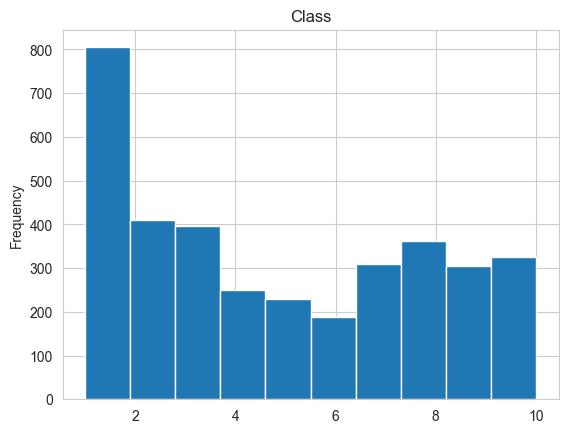

In [57]:
##Create a Histogram
airline_data['Rating'].plot(kind = 'hist', title = 'Class')
#From de Grpah we could be a Normal distribution data

### Encoding

In [58]:
airline_data_encoded = airline_data[['Flying_month','Rating','Traveller_type','Class']]

enc = LabelEncoder()
airline_data_encoded['Traveller_type'] = enc.fit_transform(airline_data_encoded['Traveller_type'])
airline_data_encoded['Class'] = enc.fit_transform(airline_data_encoded['Class'])
airline_data_encoded['Flying_month'] = enc.fit_transform(airline_data_encoded['Flying_month'])
airline_data_encoded['Origin'] = enc.fit_transform(airline_data_encoded['Flying_month'])
airline_data_encoded['Destiny'] = enc.fit_transform(airline_data_encoded['Flying_month'])

# 4. Research Questions

## 4.1 •	Are the customers “Class” flight selections influenced by the “Traveller type” and “Route Origin”? 
o  Null Hypothesis: There is no relationship between Class and Traveller Type
o	Alternative Hypothesis: There is relationship between Class and Traveller Type

In [59]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_encoded['Traveller_type']
data2 = airline_data_encoded['Class']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=39.833, p=39.833
Probably different distributions


Text(0, 0.5, 'Frequency')

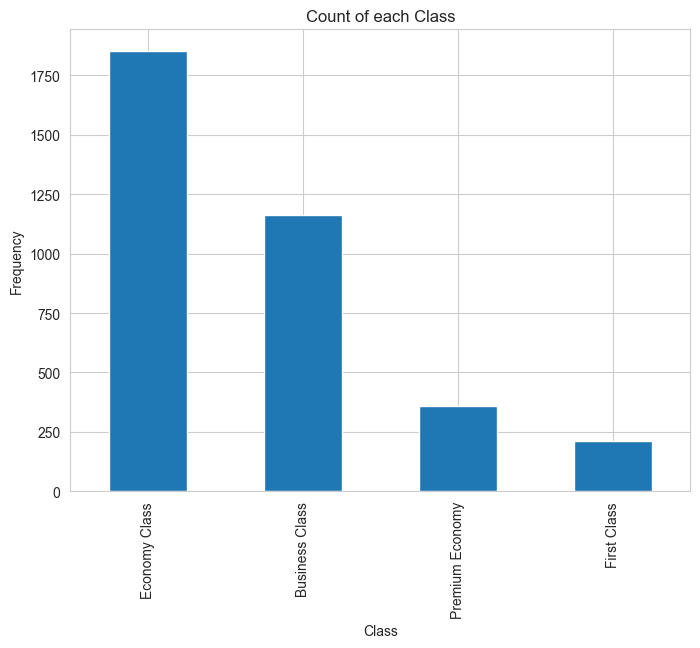

In [60]:
ax = airline_data['Class'].value_counts().plot(kind='bar', figsize=(8,6), title="Count of each Class")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")

o	Null Hypothesis: There is no relationship between Class and Route Origin
o	Alternative Hypothesis: There is relationship between Class and Route Origin


In [61]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_encoded['Origin']
data2 = airline_data_encoded['Class']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=191.127, p=191.127
Probably different distributions


## 4.2	Are the customers travelling in holidays more satisfied?
o   Null Hypothesis: There is no relationship between Rating and Flying Month
o	Alternative Hypothesis: There is relationship between Rating and Flying Month


In [62]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_month['Rating']
data2 = airline_data_month['Month']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=airline_data_month['Month'],y=airline_data_month['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

## 4.3 •	3.	What kind of customers are more likelihood to have a successful holiday?
o    Null Hypothesis: There is no significance difference in the average rating based on Class.
o	Alternative Hypothesis: There is significance difference in the average rating based on Class.
o	Null Hypothesis: There is no significance difference in the average rating based on Traveller Type
o	Alternative Hypothesis: There is significance difference in the average rating based on Traveller Type



In [ ]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_encoded['Rating']
data2 = airline_data_encoded['Traveller_type']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

In [ ]:
plt.figure(figsize=(6,6))
my_plot = sns.boxplot(x=airline_data['Traveller_type'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [ ]:
airline_data.groupby('Traveller_type').count()

## 4.4 What are the most popular routes in “British Airways” airline?
o	Null Hypothesis: There is no significance difference in the average rating based on Routes.
o	Alternative Hypothesis: There is significance difference in the average rating based on Routes




In [ ]:
subset_type = airline_data[(airline_data['Traveller_type'].str.contains('|'.join(['Solo Leisure','Couple Leisure','Family Leisure','Business']), na=False))]

In [ ]:
plt.figure(figsize=(6,6))
my_plot = sns.boxplot(x=subset_type['Traveller_type'],y=subset_type['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)